buy and hold strategy python
### 수정해야할 것들.
1. 데이터 경로 맞추기.

# Buy &Hold Strategy

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../data/us_etf_data/AMZN.csv',index_col='Date', parse_dates=['Date'])

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [ ]:
# 결측치 조회

In [6]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [7]:
price_df = df.loc[:,['Adj Close']].copy()

In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/ch03/AMZN_결측값.csv',index_col='Date', parse_dates=['Date'])
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-21,NaN,1.645833,1.375000,1.427083,1.427083,18853200.0
1997-05-27,1.510417,NaN,1.458333,1.583333,1.583333,8697600.0
1997-06-02,1.510417,1.531250,NaN,1.510417,1.510417,591600.0
1997-06-11,1.593750,1.604167,1.531250,NaN,1.541667,1188000.0
1997-06-19,1.510417,1.531250,1.500000,1.510417,NaN,1003200.0
1997-06-24,1.505208,1.526042,1.479167,1.510417,1.510417,NaN
2000-07-14,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-25,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-22,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 데이터 슬라이싱

<AxesSubplot:xlabel='Date'>

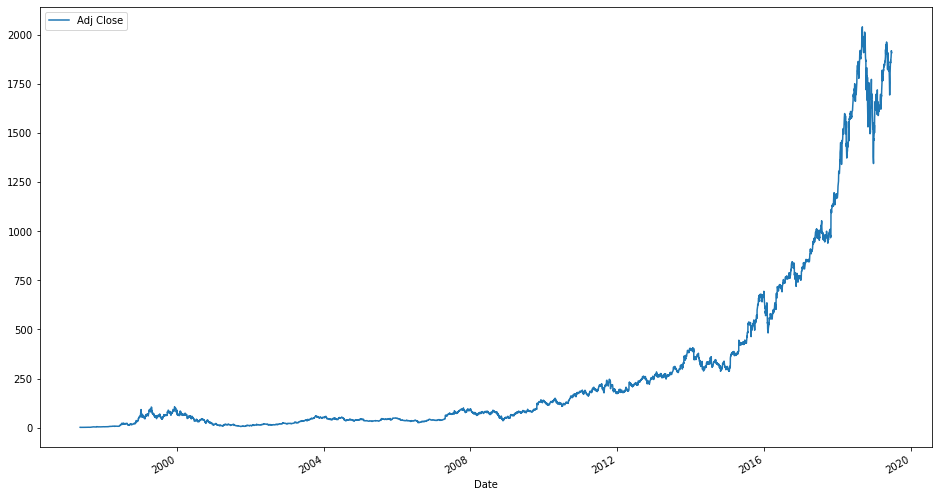

In [9]:
price_df.plot(figsize=(16,9))

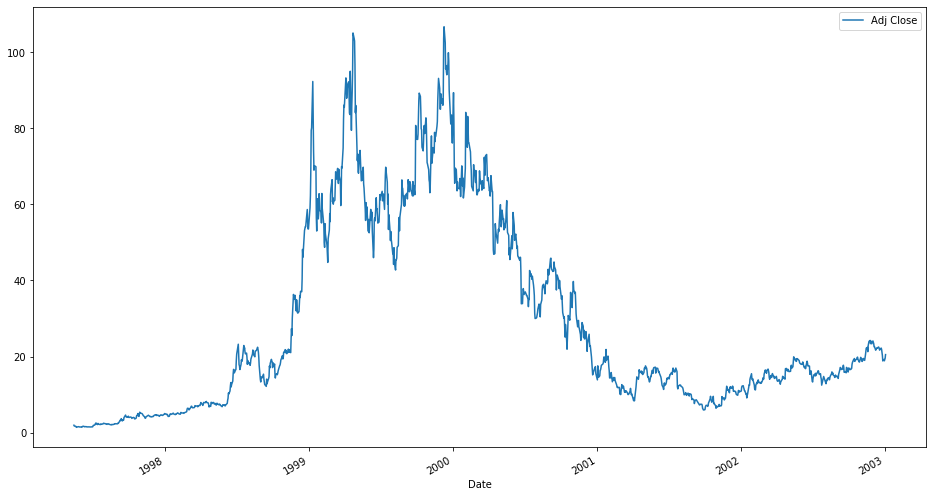

In [8]:
from_date = '1997-01-03'
to_date = '2003-01-03'
price_df.loc[from_date:to_date].plot(figsize=(16,9))

## 일별 수익률 계산하기* Buy &Hold Strategy

In [70]:
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()

In [71]:
price_df.head(10)

,Adj Close,daily_rtn,st_rtn
Date,,,
1997-05-15,1.958333,NaN,NaN
1997-05-16,1.729167,-0.117021,0.882979
1997-05-19,1.708333,-0.012049,0.872340
1997-05-20,1.635417,-0.042683,0.835107
1997-05-21,1.427083,-0.127389,0.728723
1997-05-22,1.395833,-0.021898,0.712766
1997-05-23,1.500000,0.074627,0.765958
1997-05-27,1.583333,0.055555,0.808511
1997-05-28,1.531250,-0.032895,0.781915


In [12]:
#  Buy &Hold Strategy 누적 곱을 계산 한 사례  판단스 cumprod() 함수 사용
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()

In [13]:
price_df.tail(10)

,Adj Close,daily_rtn,st_rtn
Date,,,
2019-06-11,1863.699951,0.001650,951.676733
2019-06-12,1855.319946,-0.004496,947.397580
2019-06-13,1870.300049,0.008074,955.046996
2019-06-14,1869.670044,-0.000337,954.725291
2019-06-17,1886.030029,0.008750,963.079328
2019-06-18,1901.369995,0.008133,970.912503
2019-06-19,1908.790039,0.003902,974.701462
2019-06-20,1918.189941,0.004925,979.501413
2019-06-21,1911.300049,-0.003592,975.983170


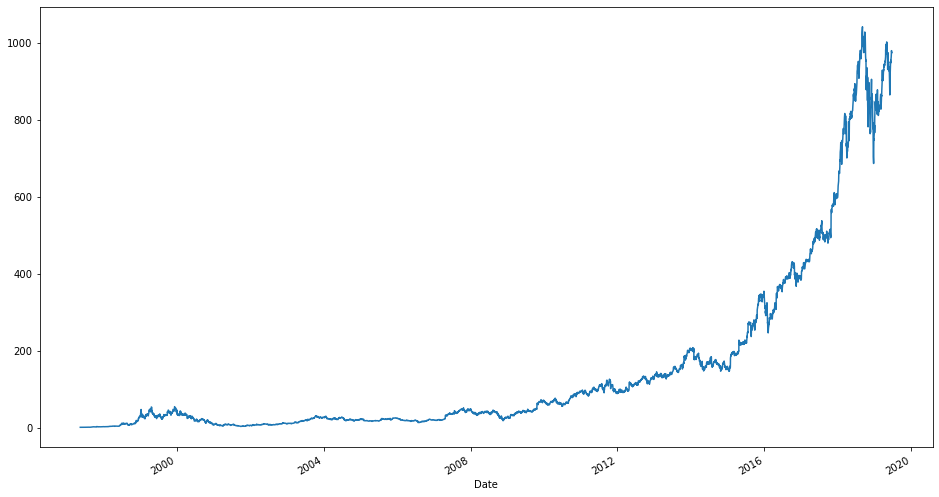

In [13]:
price_df['st_rtn'].plot(figsize=(16,9))

In [14]:
first_date = price_df.index[0]
last_date = price_df.index[-1]

In [15]:
first_date = price_df.index[0]
(price_df.loc[last_date,'Adj Close'] / price_df.loc[first_date,'Adj Close'] )

974.2744757914

In [16]:
price_df.tail()

,Adj Close,daily_rtn,st_rtn
Date,,,
2019-06-18,1901.369995,0.008133,970.912503
2019-06-19,1908.790039,0.003902,974.701462
2019-06-20,1918.189941,0.004925,979.501413
2019-06-21,1911.300049,-0.003592,975.983170
2019-06-24,1907.953857,-0.001751,974.274476


누적 수익 :  974.2744757914056


<AxesSubplot:xlabel='Date'>

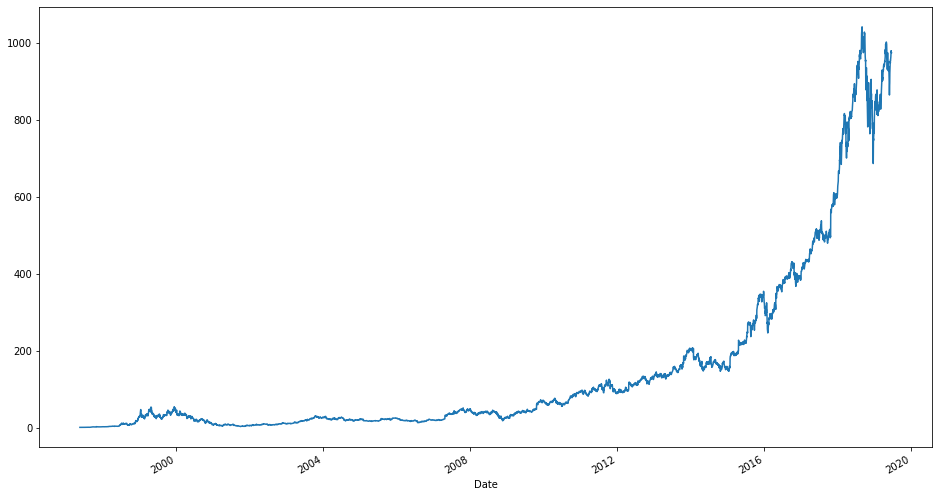

In [17]:
last_date = price_df.index[-1]
print('누적 수익 : ',price_df.loc[last_date,'st_rtn'])
price_df['st_rtn'].plot(figsize=(16,9))

누적 수익 :  10.35693109674889


<AxesSubplot:xlabel='Date'>

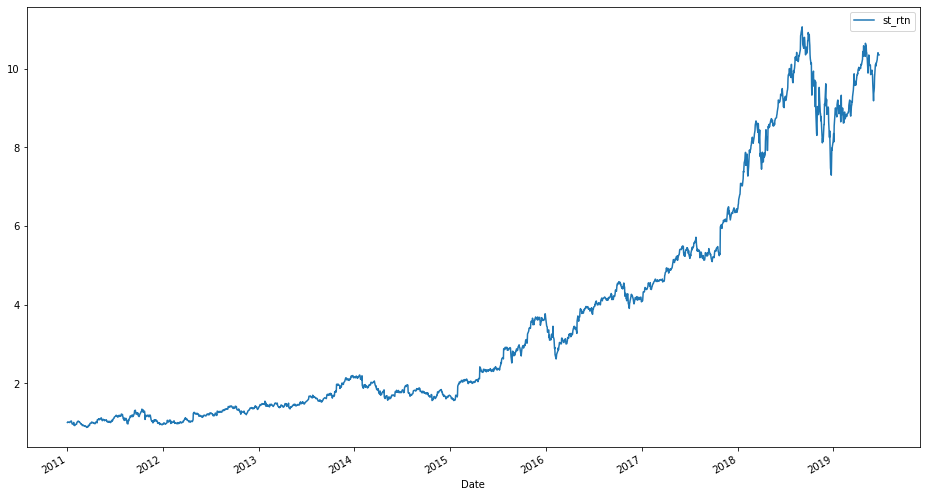

In [18]:
base_date = '2011-01-03'
tmp_df = price_df.loc[base_date:,['st_rtn']] / price_df.loc[base_date ,['st_rtn']]
last_date = tmp_df.index[-1]
print('누적 수익 : ',tmp_df.loc[last_date,'st_rtn'])
tmp_df.plot(figsize=(16,9))

## Performance Measure

# CAGR

# MDD

# Sharpe Ratio

## 별도 pt 자료 활용 이해 할것

# Backtesting

<AxesSubplot:xlabel='Date'>

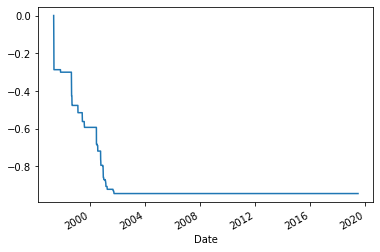

In [23]:
# cummax() : 수정종가에서 최고가 저장
# cummin() : 최대 하락 계산 
# 그래프로 보는 경우

historical_max = price_df['Adj Close'].cummax()
daily_drawdown = price_df['Adj Close'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

In [20]:
price_df.head()

,Adj Close,daily_rtn,st_rtn
Date,,,
1997-05-15,1.958333,NaN,NaN
1997-05-16,1.729167,-0.117021,0.882979
1997-05-19,1.708333,-0.012049,0.872340
1997-05-20,1.635417,-0.042683,0.835107
1997-05-21,1.427083,-0.127389,0.728723


In [21]:
## Performance Measure
# CAGR :  일별data 를 사용 한 경우--> 전체연도를 계산하는 경우 전체 data 기간을 252영업일로 나눈 역수를 제곱(승)을 한 후 -1 을 한다.
# MDD(Max-DrawDown : 
# VOL : 연 주가수익률 표준편차 = 일변 주가수익률 X  252일 제곱근 (영업일수 고려, IID 가정 )
# Sharpe : 총위험 1단위당 초과수익률 ( 위험을 고려한 초과수익)

CAGR = price_df.loc['2019-06-24','st_rtn'] ** (252./len(price_df.index)) -1
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)
MDD = historical_dd.min()

In [22]:
# vol 변동성 

print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

CAGR :  36.58 %
Sharpe :  0.81
VOL :  60.09 %
MDD :  94.4 %


In [ ]:
#  국내 주식시장을 대표하는 KOSPI 변화를 살펴보면


In [24]:
import pandas as pd
import numpy as np

In [ ]:
historical_max = price_df['Adj Close'].cummax()
daily_drawdown = price_df['Adj Close'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

In [ ]:
CAGR = price_df.loc['2019-06-24','st_rtn'] ** (252./len(price_df.index)) -1
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)
MDD = historical_dd.min()

In [38]:
print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

CAGR :  36.58 %
Sharpe :  0.81
VOL :  60.09 %
MDD :  94.4 %


## KOSPI BackTesting  살펴보기 

In [81]:
import FinanceDataReader as fdr
df1_krx = fdr.StockListing('KRX')
df1_krx.head()


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [82]:
len(df1)

1970

<AxesSubplot:xlabel='Date'>

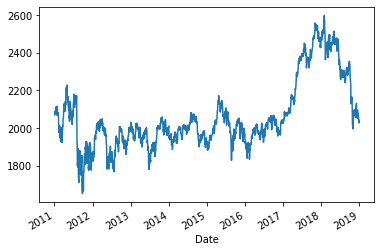

In [132]:
import pandas as pd
import numpy as np

price_df1 = fdr.DataReader('KS11', '2011-01-01','2018-12-31')
df1['Close'].plot()

In [125]:
import FinanceDataReader as fdr
price_df1.head(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2011-01-03,2070.08,2063.69,2070.09,2054.83,354080000.0,0.0093
2011-01-04,2085.14,2074.56,2085.14,2069.12,415910000.0,0.0073
2011-01-05,2082.55,2083.10,2087.14,2076.92,386060000.0,-0.0012
2011-01-06,2077.61,2094.35,2096.65,2066.10,407830000.0,-0.0024
2011-01-07,2086.20,2073.68,2086.20,2068.66,335560000.0,0.0041
2011-01-10,2080.81,2082.29,2088.64,2069.30,342640000.0,-0.0026
2011-01-11,2088.32,2079.85,2088.32,2059.67,410950000.0,0.0036
2011-01-12,2094.95,2091.70,2098.00,2085.99,433260000.0,0.0032
2011-01-13,2089.48,2097.04,2109.34,2083.80,424200000.0,-0.0026


In [133]:
price_df1.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-12-21,2061.49,2052.70,2061.51,2049.76,311390000.0,0.0007
2018-12-24,2055.01,2050.38,2059.94,2046.18,285280000.0,-0.0031
2018-12-26,2028.01,2028.81,2037.83,2014.28,321500000.0,-0.0131
2018-12-27,2028.44,2032.09,2035.57,2021.39,398020000.0,0.0002
2018-12-28,2041.04,2036.70,2046.97,2035.41,352680000.0,0.0062


## kposi 일별 수익률 계산하기 :  Buy &Hold Strategy

In [153]:
price_df1['daily_rtn'] = price_df1['Close'].pct_change()

In [154]:
price_df1.head(10)

,Close,Open,High,Low,Volume,Change,daily_rtn
Date,,,,,,,
2011-01-03,2070.08,2063.69,2070.09,2054.83,354080000.0,0.0093,NaN
2011-01-04,2085.14,2074.56,2085.14,2069.12,415910000.0,0.0073,0.007275
2011-01-05,2082.55,2083.10,2087.14,2076.92,386060000.0,-0.0012,-0.001242
2011-01-06,2077.61,2094.35,2096.65,2066.10,407830000.0,-0.0024,-0.002372
2011-01-07,2086.20,2073.68,2086.20,2068.66,335560000.0,0.0041,0.004135
2011-01-10,2080.81,2082.29,2088.64,2069.30,342640000.0,-0.0026,-0.002584
2011-01-11,2088.32,2079.85,2088.32,2059.67,410950000.0,0.0036,0.003609
2011-01-12,2094.95,2091.70,2098.00,2085.99,433260000.0,0.0032,0.003175
2011-01-13,2089.48,2097.04,2109.34,2083.80,424200000.0,-0.0026,-0.002611


In [155]:
price_df1.tail()

,Close,Open,High,Low,Volume,Change,daily_rtn
Date,,,,,,,
2018-12-21,2061.49,2052.70,2061.51,2049.76,311390000.0,0.0007,0.000665
2018-12-24,2055.01,2050.38,2059.94,2046.18,285280000.0,-0.0031,-0.003143
2018-12-26,2028.01,2028.81,2037.83,2014.28,321500000.0,-0.0131,-0.013139
2018-12-27,2028.44,2032.09,2035.57,2021.39,398020000.0,0.0002,0.000212
2018-12-28,2041.04,2036.70,2046.97,2035.41,352680000.0,0.0062,0.006212


In [156]:
#  Buy & Hold Strategy 누적 곱을 계산 한 사례  판다스 cumprod() 함수 사용
price_df1['st_rtn'] = (1+price_df1['daily_rtn']).cumprod()

<AxesSubplot:xlabel='Date'>

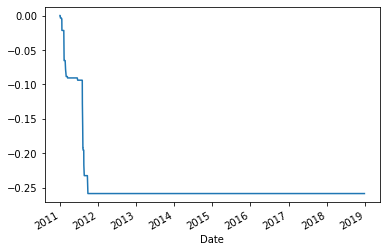

In [161]:
## mdd  필요 자료 
historical_max = price_df1['Close'].cummax()
daily_drawdown = price_df1['Close'] / historical_max1 - 1.0
historical_dd = daily_drawdown1.cummin()
historical_dd.plot()

In [162]:
CAGR = price_df1.loc['2018-12-28','st_rtn'] ** (252./len(price_df1.index)) -1
Sharpe = np.mean(price_df1['daily_rtn']) / np.std(price_df1['daily_rtn']) * np.sqrt(252.)
VOL = np.std(price_df1['daily_rtn']) * np.sqrt(252.)
MDD = historical_dd.min()
print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

CAGR :  -0.18 %
Sharpe :  0.06
VOL :  14.94 %
MDD :  25.85 %


## kospi 약 10년치 성과 평가를 꼭 기억 하시기 바랍니다!!!!!!!!!!!!!!!!!!!!!!!

# ***** 9년간 -0.18% 인데 반해  MDD 25,85% 입니다.********

# 만약 지난해 2020년을 포함했다면 MDD가 약 -52% 에 접근 

# 다만 특수 상황이라 배제했습니다.

# 100%=-50% ,  -50%=100%    Don't forget it!!!!!!!!!!!!!!!

## 다양한 Strategy 전략에 따른 BackTesting 에 코딩은 구글링하면 쉽게 얻을 수 있음

# 저명한 퀀트 전략에 대한 알고리즘 필요한 분은 개별적으로 얘기하시면 공유

# 드릴께요 ^^